In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
x = pd.read_csv('HD_x.csv')
y = pd.read_csv('HD_y.csv')

In [64]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [65]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [66]:
x.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [67]:
x.ca=x.ca.fillna(x.ca.median())

In [68]:
x.thal= x.thal.fillna(x.thal.median())

In [69]:
columns = x.columns

In [70]:
range(len(columns))

range(0, 13)

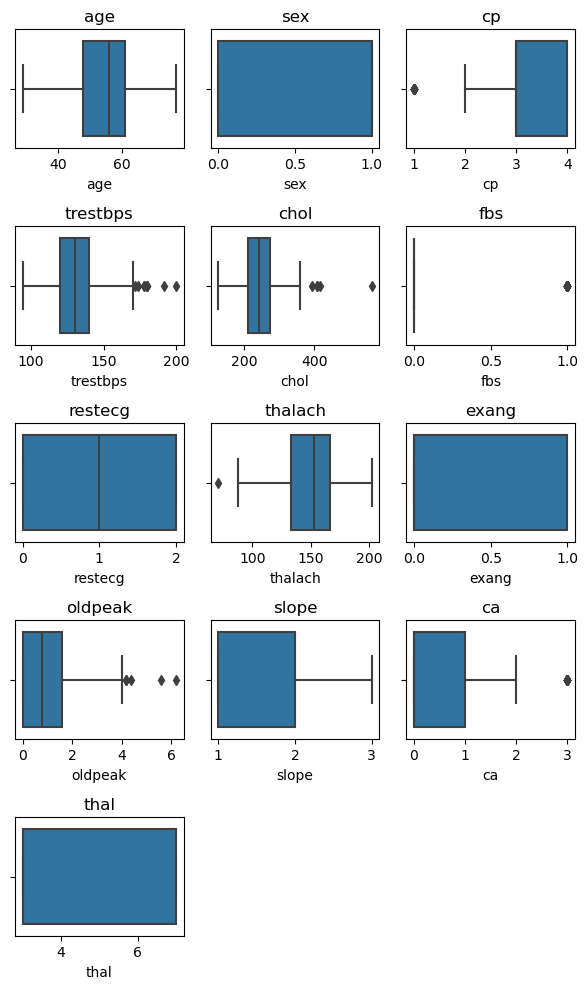

In [71]:
plt.figure(figsize=(6,10))
for i in range(0,13):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=x[columns[i]])
    plt.title(columns[i])

plt.tight_layout()

In [72]:
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [73]:
bpsiqr= 140-120
UL= 140+1.5*(bpsiqr)
x.trestbps = np.where(x.trestbps>UL,UL-0.5,x.trestbps)

In [74]:
choliqr = 275-211
UL = 275+1.5*(choliqr)
x.chol = np.where(x.chol>UL,UL,x.chol)

In [75]:
lachiqr = 166-133.5
LL = 133.5 - 1.5*(lachiqr)
x.thalach = np.where(x.thalach<LL,LL,x.thalach)

In [76]:
peakiqr = 1.6-0
UL=1.6+1.5*(peakiqr)
x.oldpeak = np.where(x.oldpeak>UL,UL,x.oldpeak)

In [77]:
x.ca = np.where(x.ca>2,2,x.ca)

In [78]:
x.cp = np.where(x.cp<2,2,x.cp)

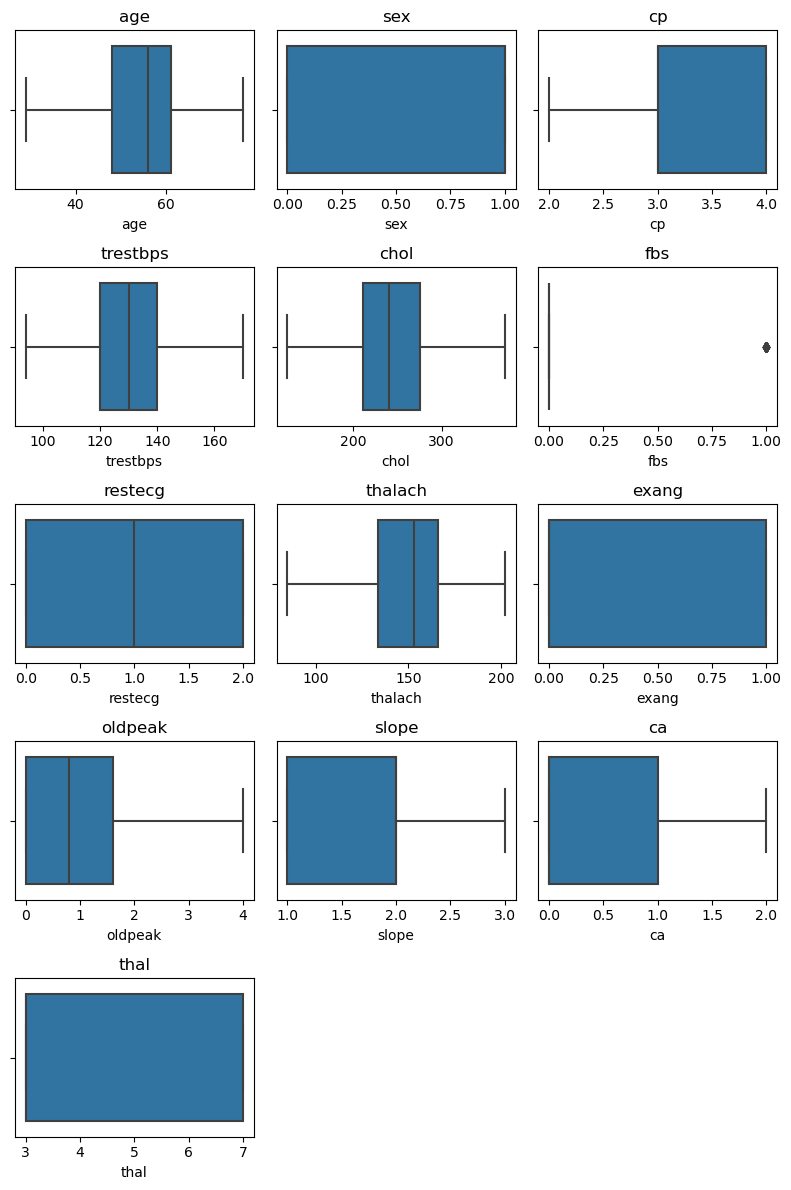

In [79]:
plt.figure(figsize=(8,12))
for i in range(0,13):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=x[columns[i]])
    plt.title(columns[i])

plt.tight_layout()

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [81]:
oe = OrdinalEncoder()

In [82]:
cols = ['age','trestbps','chol','thalach']

In [83]:
x[cols] = oe.fit_transform(x[cols])

In [84]:
xy = pd.concat([x,y],axis=1)

In [85]:
xy.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [86]:
xy_0 = xy[xy.num==0]

In [87]:
xy_1 = xy[xy.num==1]

In [88]:
xy_2 = xy[xy.num==2]

In [89]:
xy_3 = xy[xy.num==3]

In [90]:
xy_4 = xy[xy.num==4]

In [91]:
from sklearn.utils import resample

In [92]:
xy_1a = resample(xy_1,replace=True,n_samples=164,random_state=42)

In [93]:
xy_2a = resample(xy_2,replace=True,n_samples=164,random_state=42)

In [94]:
xy_3a = resample(xy_3,replace=True,n_samples=164,random_state=42)

In [95]:
xy_4a = resample(xy_4,replace=True,n_samples=164,random_state=42)

In [96]:
xy_new = pd.concat([xy_0,xy_1a,xy_2a,xy_3a,xy_4a])

In [97]:
x = xy_new.drop('num',axis=1)

In [98]:
y = xy_new.num

In [99]:
x.shape,y.shape

((820, 13), (820,))

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr = LogisticRegression(random_state=42)

In [104]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [105]:
pred = lr.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

In [107]:
accuracy_score(pred,y_test).round(2)

0.43

In [108]:
pred_tr = lr.predict(x_train)

In [109]:
accuracy_score(pred_tr,y_train)

0.47735191637630664

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(max_features=8,max_depth=12,random_state=42)

In [112]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_features=8, random_state=42)

In [113]:
predrf = rfc.predict(x_test)

In [114]:
accuracy_score(predrf,y_test).round(2)

0.95

In [115]:
predrf_tr = rfc.predict(x_train)

In [116]:
accuracy_score(predrf_tr,y_train)

1.0

In [117]:
xy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,29.0,1,2,31.0,64.0,1,2,49.0,0,2.3,3,0,6,0
1,33.0,1,4,40.0,111.0,0,2,10.0,1,1.5,2,2,3,2
2,33.0,1,4,14.0,60.0,0,2,29.0,1,2.6,2,2,7,1
3,3.0,1,3,22.0,80.0,0,0,84.0,0,3.5,3,0,3,0
4,7.0,0,2,22.0,35.0,0,2,71.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,11.0,1,2,8.0,93.0,0,0,32.0,0,1.2,2,0,7,1
299,34.0,1,4,30.0,26.0,1,0,40.0,0,3.4,2,2,7,2
300,23.0,1,4,22.0,1.0,0,0,16.0,1,1.2,2,1,7,3
301,23.0,0,2,22.0,67.0,0,2,73.0,0,0.0,2,1,3,1


In [118]:
rfc.predict([[33.0,1,4,40.0,111.0,0,2,10.0,1,1.5,2,2,3]])

array([2], dtype=int64)

In [119]:
ad = pd.Series(rfc.feature_importances_,index=x_train.columns)

In [120]:
ad.sort_values(ascending=False)

chol        0.145988
thalach     0.143912
age         0.125848
trestbps    0.123923
oldpeak     0.123266
ca          0.077484
cp          0.058428
thal        0.055801
slope       0.040814
restecg     0.034092
exang       0.033554
sex         0.019385
fbs         0.017505
dtype: float64